# Detecção de fraudes no Standard Bank

Irei usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação. 
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.

## Análise com Pandas

In [113]:
import pandas as pd

In [114]:
df = pd.read_csv("fraud_dataset_example.csv")
df

step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            0.00            0.00        0   
2                 0.00   C553264065            0.00            0.00        1   
3                 0.00    C38997010        21182.00            0.00        1   
4             29885.86  M1230701703            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
101608            0.00   M524833426            0.00            0.00        0   
101609            0.00  C1172042998        95156.01        91286.97        0   
101610            0.00   M334249577            0.00            0.00        0   
101611            0.00  C1631408038       541639.43      2186953.43        0   
101612            0.00  C1383702768            0.00       469539.21        0   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
101608               0  
101609               0  
101610               0  
101611               0  
101612               0  

[101613 rows x 11 columns]

In [115]:
df.columns
# Visualizar colunas

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Trazendo as colunas de fraude para o começo do dataset

In [116]:
df = df[[ 'isFraud',
       'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]

# passar as dual ultimas colunas para frente para melhorar o entendimento dos dados (totalmente opcional)

In [117]:
df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

### Renomeando as colunas

In [118]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

# Traduzindo as colunas para o portugues

In [119]:
df = df.rename(columns = colunas)
df.head()

fraude  super_fraude  tempo      tipo     valor     cliente1  \
0       0             0      1   PAYMENT   9839.64  C1231006815   
1       0             0      1   PAYMENT   1864.28  C1666544295   
2       1             0      1  TRANSFER    181.00  C1305486145   
3       1             0      1  CASH_OUT    181.00   C840083671   
4       0             0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo_c1     cliente2  saldo_inicial_c2  \
0          170136.0      160296.36  M1979787155               0.0   
1           21249.0       19384.72  M2044282225               0.0   
2             181.0           0.00   C553264065               0.0   
3             181.0           0.00    C38997010           21182.0   
4           41554.0       29885.86  M1230701703               0.0   

   novo_saldo_c2  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

### Outras informações do dataset

In [120]:
df.describe()
# Estatisticas basicas do dataset

fraude  super_fraude          tempo         valor  \
count  101613.000000      101613.0  101613.000000  1.016130e+05   
mean        0.001142           0.0       8.523457  1.740901e+05   
std         0.033768           0.0       1.820681  3.450199e+05   
min         0.000000           0.0       1.000000  3.200000e-01   
25%         0.000000           0.0       8.000000  1.001659e+04   
50%         0.000000           0.0       9.000000  5.338541e+04   
75%         0.000000           0.0      10.000000  2.124984e+05   
max         1.000000           0.0      10.000000  1.000000e+07   

       saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  novo_saldo_c2  
count      1.016130e+05   1.016130e+05      1.016130e+05   1.016130e+05  
mean       9.071753e+05   9.234992e+05      8.810428e+05   1.183998e+06  
std        2.829575e+06   2.867319e+06      2.399949e+06   2.797761e+06  
min        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
25%        0.000000e+00   0.000000e+00      0.000000e+00   0.000000e+00  
50%        2.019047e+04   0.000000e+00      2.105800e+04   5.178343e+04  
75%        1.947150e+05   2.192178e+05      5.919217e+05   1.063122e+06  
max        3.893942e+07   3.894623e+07      3.400874e+07   3.894623e+07

O método describe() fornece as informações sobre:

**count** - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

**mean** - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

**std** - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

**min** e **max** - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

**quartis** - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).

In [121]:
df.shape

(101613, 11)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


### Verificando a variável objectivo

In [123]:
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

Temos no nosso dataset 116 casos de fraude

In [124]:
df.isnull().values.any()

False

Não temos valores nulos o que sugere que as nossas variaveis objetivo já estão limpas 
e não carecem de qualquer tratamento adicional

## Encoding

### Pandas Profiling

Instalando o Pandas Profiling

```!pip install -U pandas-profiling```

In [125]:
#!pip install -U pandas-profiling

In [126]:
#!pip install -U ydata-profiling

In [127]:
import pandas_profiling

pandas_profiling.ProfileReport(df)
# Fazendo analises com o pandasProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Aplicando o Encoding

Precisamos transformar a variavel "tipo" de modo que não esteja no formato object para que seja possivel fazer análises dos diferentes tipos de pagamentos.

Para isso usaremos o **encoding** que consiste em transformar variáveis categoricas em variaveis numéricas de modo a possibilitar tais análises.

#### **Tipos de encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.

Neste caso iremos usar o **One-Hot Encoding** porque nao queremos que se criem hierarquias nas categorias e para evitar um certo viés que pode surgir como resultado disso.

In [128]:
df = pd.get_dummies(data = df, columns= ['tipo'])
df.head()
# Fazer one-hot encoding atravez do pandas 

fraude  super_fraude  tempo     valor     cliente1  saldo_inicial_c1  \
0       0             0      1   9839.64  C1231006815          170136.0   
1       0             0      1   1864.28  C1666544295           21249.0   
2       1             0      1    181.00  C1305486145             181.0   
3       1             0      1    181.00   C840083671             181.0   
4       0             0      1  11668.14  C2048537720           41554.0   

   novo_saldo_c1     cliente2  saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  \
0      160296.36  M1979787155               0.0            0.0         False   
1       19384.72  M2044282225               0.0            0.0         False   
2           0.00   C553264065               0.0            0.0         False   
3           0.00    C38997010           21182.0            0.0         False   
4       29885.86  M1230701703               0.0            0.0         False   

   tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0          False       False          True          False  
1          False       False          True          False  
2          False       False         False           True  
3           True       False         False          False  
4          False       False          True          False

#### Remoção de variáveis

Iremos remover as variaveis de clientes por razões de privacidade e também porque não serão muito úteis no momento.

Também iremos remover a variavel **super_fraude** porque na prática só apresenta valor zero

In [129]:
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis = 1)

In [130]:
df.head()

fraude  tempo     valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0       0      1   9839.64          170136.0      160296.36               0.0   
1       0      1   1864.28           21249.0       19384.72               0.0   
2       1      1    181.00             181.0           0.00               0.0   
3       1      1    181.00             181.0           0.00           21182.0   
4       0      1  11668.14           41554.0       29885.86               0.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0            0.0         False          False       False          True   
1            0.0         False          False       False          True   
2            0.0         False          False       False         False   
3            0.0         False           True       False         False   
4            0.0         False          False       False          True   

   tipo_TRANSFER  
0          False  
1          False  
2           True  
3          False  
4          False

## Regressão Logística

In [131]:
x = df.drop('fraude', axis= 1)
y = df['fraude']
# tirando a coluna de fraude e deixando o resto da tabela como valores de x

In [132]:
from sklearn.model_selection import train_test_split

SEED = 42   # definindo matriz de reprodutibilidade

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)
# 25% dos dados serão usaddos para fazer testes no nosso modelo e o restante será para treino

Agora já temos os nossos dados divididos em treino e teste para aplicar o modelo de regressão logística

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


### Métricas de avaliação

In [134]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9990552668871044
Precisão: 0.3333333333333333
Recall: 0.043478260869565216
F1: 0.07692307692307693


**Acurácia** significa que em termos gerais o modelo esta a apender bem os padrões dos dados de treino fornecidos

**Precisão** avalia a quantidade de verdadeiros positivos que o modelo apresenta, ou seja, quantas vezes ele identifica corretamente uma fraude

**Recall** avalia a capacidade do modelo classificar corretamente as classes de modo geral como fraude ou não

**f1** média harmónica entre a Precisão e o Recall

Para o caso da nossa regressão podemos ver que o nivel de acurácia esta muito alto, porém as outras métricas estão muito baixas o que colocam em causa a confiabilidade dessa acurácia

Para entender melhor os resultados destas métricas iremos usar a confusion matrix

### Matriz de Confusão

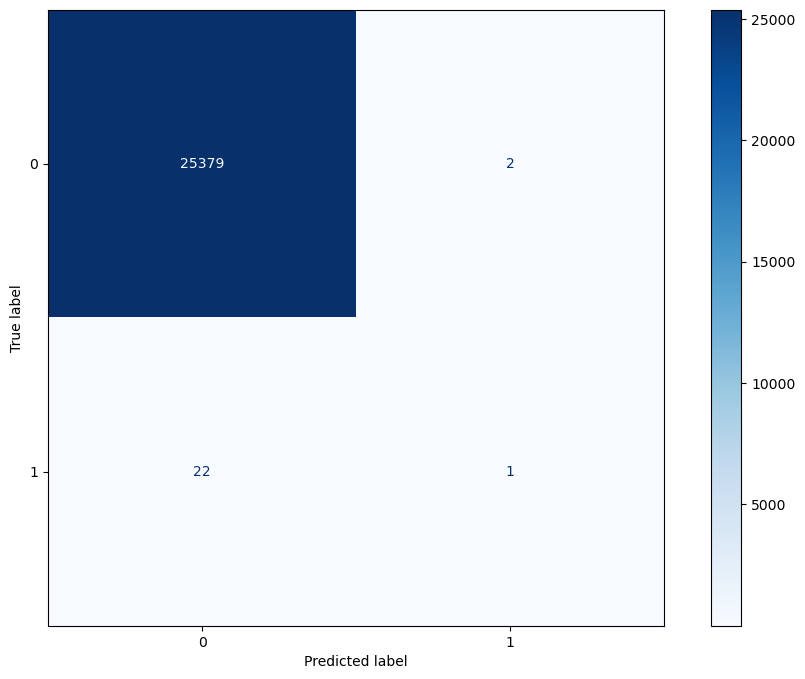

In [135]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


Como puderam perceber, a matriz de confusão é uma matriz 2x2 e em cada quadrante dela existe uma métrica estatística que nos diz algo sobre o modelo. Vamos entender o que cada quadrante representa no contexto da detecção de fraude.

**Verdadeiros Positivos (VP)**

O quadrante superior esquerdo representa os verdadeiros positivos. No contexto da detecção de fraude, isso significa que o modelo identificou corretamente uma transação fraudulenta. Ou seja, havia uma fraude e o modelo previu corretamente que era fraude. Esse é um resultado desejável, pois significa que a inteligência do modelo está a conseguir capturar casos reais de fraude.

**Falsos Positivos (FP)**

O quadrante superior direito representa os falsos positivos. Isso significa que o modelo classificou uma transação como fraudulenta quando, na verdade, ela era uma transação lícita. Esse tipo de erro pode causar inconvenientes para clientes, pois pode levar ao bloqueio indevido de transações legítimas, afetando a experiência do usuário e podendo gerar insatisfação.

**Falsos Negativos (FN)**

O quadrante inferior esquerdo representa os falsos negativos. Isso ocorre quando o modelo classifica uma transação fraudulenta como uma transação lícita. Esse é um dos erros mais críticos, pois significa que uma fraude passou despercebida pelo modelo. Se um número elevado de transações fraudulentas não forem detectadas, o impacto financeiro pode ser significativo para uma instituição.

**Verdadeiros Negativos (VN)**

Por fim, o quadrante inferior direito representa os verdadeiros negativos. Isso significa que o modelo classificou corretamente uma transação lícita como não fraudulenta. Esse é um resultado esperado e desejável, pois evita falsos alarmes e garante que os usuários possam continuar realizando suas transações normalmente sem interrupções indevidas.





Analisando a nossa matriz de confusão, podemos notar que ela apresenta muitos acertos para os verdadeiros positivos, mas que para outras métricas o mesmo não se verifica principalmente para os **verdadeiros negativos**

### Curva ROC

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc 0.9938742263555587


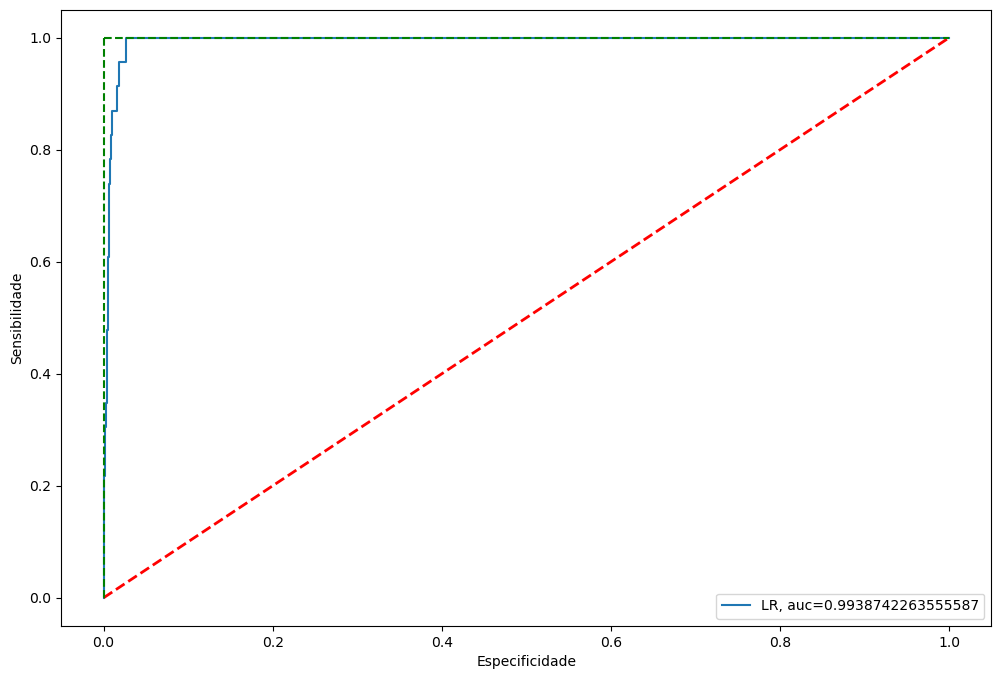

In [137]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('roc_auc', roc_auc_score(y_test, y_pred_proba)) # calcular a área sobre a curva roc

plt.rcParams['figure.figsize'] = (12., 8.)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.legend(loc=4)

### Explicação sobre Curva ROC e AUC

Agora vamos entender melhor o que são TFP, TVP e o significado dessas taxas, que também são chamadas de **sensibilidade** e **especificidade**. Vamos nos aprofundar na **Curva ROC**, que avalia o desempenho de um modelo ao comparar a taxa de verdadeiros positivos com a taxa de falsos positivos, em diferentes limiares.

##
### Sensibilidade e Especificidade

- **Verdadeiros Positivos (Sensibilidade)**: Também chamada de _recall_, indica a taxa de acertos para a categoria alvo, ou seja, a classe "1".
- **Falsos Positivos (Especificidade)**: Mede a taxa de erros ao classificar a categoria "0" como "1".

As fórmulas para calcular essas métricas são:

- **Especificidade** = Verdadeiros Negativos / (Verdadeiros Negativos + Falsos Positivos)
- **Sensibilidade** = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Neg##ativos)

### Curva ROC

A **Curva ROC** representa a relação entre a sensibilidade e a especificidade. No gráfico da curva ROC:

- A **linha vermelha** representa um modelo **aleatório**, em que as previsões são feitas sem seguir nenhuma tendência.
- A **linha verde** representa um modelo **perfeito**, onde todas as previsões estão corretas.

Sabemos que tanto um modelo perfeito quanto um totalmente aleatório são improváveis. Assim, a **Curva ROC real** estará sempre entre essas duas linhas.

### Objetivo da Curva ROC

Nosso objetivo é que a curva ROC esteja o mais próxima possível da linha verde, especificamente no **canto superior esquerdo** do gráfico. Isso **maximiza a taxa de verdadeiros positivos** e **minimiza a de falsos positivos**, o que é o cenário ideal.

### AUC (Área sob a Curva)

Para quantificar a curva ROC, utilizamos a **Área Sob a Curva** (AUC), que nos dá uma medida da performance do modelo. Existem algumas convenções estatísticas para interpretar a AUC:

| AUC Range          | Interpretação           |
|--------------------|-------------------------|
| Área < 0.7         | Discriminação baixa      |
| 0.7 ≤ Área < 0.8   | Discriminação aceitável  |
| 0.8 ≤ Área < 0.9   | Discriminação excelente  |
| Área ≥ 0.9         | Discriminação excepcional|

No nosso gráfico, a AUC é **0.99**, o que indica uma **discriminação excelente** de acordo com essa convenção, porém, já vimos que outras métricas não apresentam resultados tão positivos o que prejudica a nossa capacidade de analise e validação de resultados.


 Esta situação pode estar a ser causada pelo facto dos dados estarem desbalanceados uma vez que de todo o dataset apenas 116 observações são fruaudulentas, como pudemos ver no relatório do pandas profilling.

## Balanceamento de dados

In [138]:
#pip install -U imbalanced-learn

In [139]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED = 42

smote = SMOTE(random_state= 42)

x = df.drop('fraude', axis=1)
y = df['fraude']

x_resampled, y_resampled = smote.fit_resample(x,y)

df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

fraude  tempo          valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000         False          False   
1               0.000000       0.000000         False          False   
2               0.000000       0.000000         False          False   
3           21182.000000       0.000000         False           True   
4               0.000000       0.000000         False          False   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000         False          False   
202990          0.000000       0.000000         False          False   
202991       1945.589357    9370.603471         False           True   
202992          0.000000       0.000000         False          False   
202993          0.000000       0.000000         False          False   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0            False          True          False  
1            False          True          False  
2            False         False           True  
3            False         False          False  
4            False          True          False  
...            ...           ...            ...  
202989       False         False           True  
202990       False         False           True  
202991       False         False           True  
202992       False         False           True  
202993       False         False           True  

[202994 rows x 12 columns]

In [140]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

Após realizar o balanceamento das observações da variavel fraude, podemos prosseguir com o novo teste do modelo de regressão logística

#### Novo teste do Regressão Logística

In [141]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [142]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

### Métricas de avaliação

In [144]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.965437742615618
Precisão: 0.96745679403837
Recall: 0.9631807419100237
F1: 0.9653140325897801


Com os dados balanceados, é possivel notar que para além da acurácia ter se mantido alta, as outras métricas também registraram uma evolução consideravel

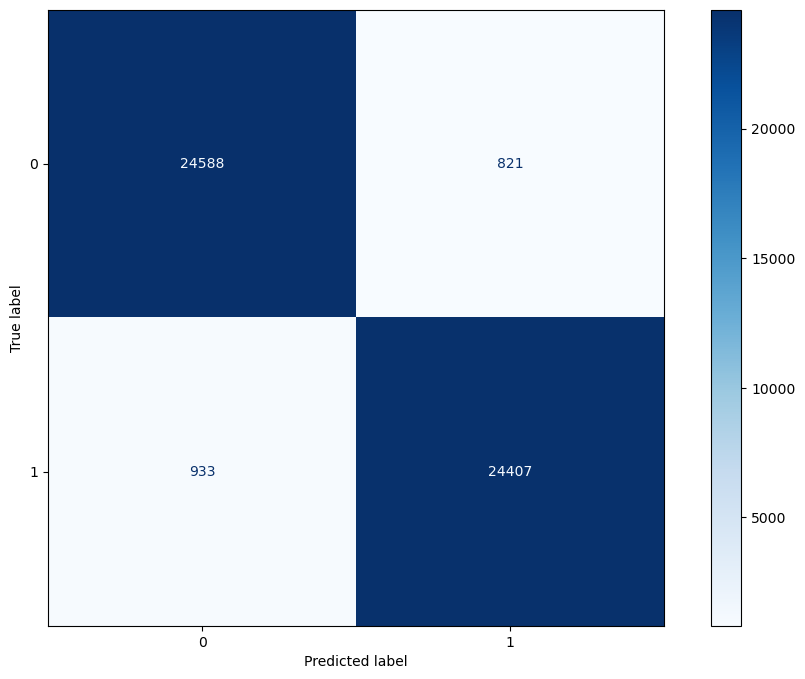

In [145]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


Em relação a matriz de confusão, também podemos notar uma grande evolução do modelo em identificar situações de fraude e não fraude corretamente (verdadeiros positivos e verdadeiros negativos altos)

e em contrapartida o modelo esta a cometer erros relativamente menores nas suas previsões ( falsos positivos e falsos negativos baixos)

Em seguida irei formular algumas hipóteses e estimar mais modelos para podermos avaliar mais opções e no final escolher o que tiver melhor desempenho

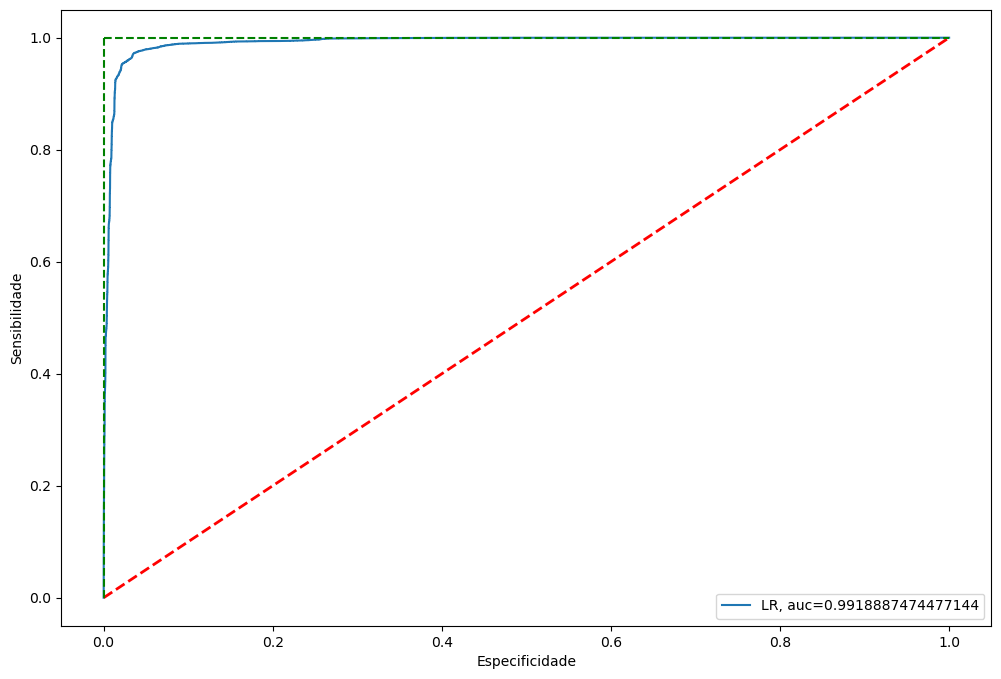

In [146]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.legend(loc=4)

## Formulando as hipóteses

In [147]:
pandas_profiling.ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Hipóteses**

- tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

- O cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.

- O cliente paga as duas contas no começo do mês e houve uma movimentação no final do mês, sendo uma fraude.

## Árvore de Decisão

Uma árvore de decisão é um modelo de aprendizado de máquina baseado em uma estrutura hierárquica de decisões, onde cada nó representa uma condição de classificação e os ramos indicam os possíveis resultados dessas condições.

No contexto da detecção de fraude, uma árvore de decisão pode ser usada para classificar transações como fraudulentas ou lícitas com base em diferentes critérios, como:

Valor da transação: Transações acima de um certo limite podem ser consideradas suspeitas.

Localização geográfica: Se a transação ocorre em um país diferente do habitual, pode ser um indicativo de fraude.

Frequência de transações: Um aumento repentino no número de transações pode ser um padrão incomum.

Histórico do cliente: Se o usuário não tem histórico de compras em determinado setor e faz uma compra grande, isso pode ser sinal de fraude.

Cada decisão é feita em um nó da árvore e os dados seguem os ramos até chegarem a um nó folha, onde a classificação final é determinada (fraudulenta ou lícita). 

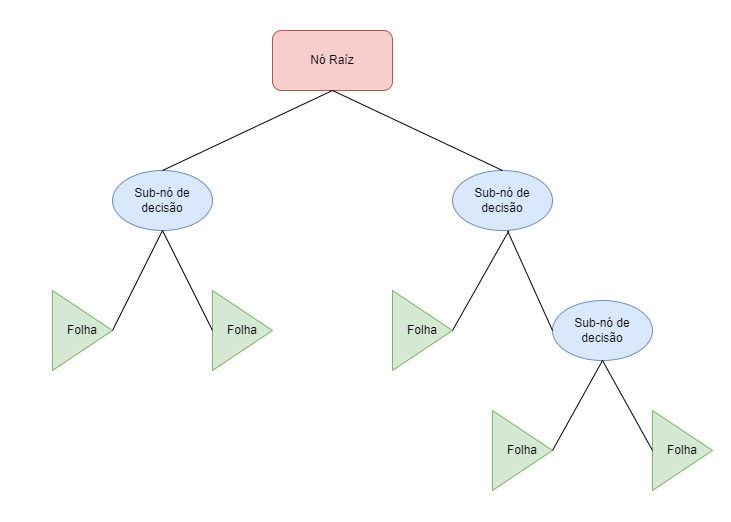


In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dt = DecisionTreeClassifier(max_depth= 5, random_state= SEED)

In [150]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

### Métricas de avaliação

In [151]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883905


### Matriz de Confusão

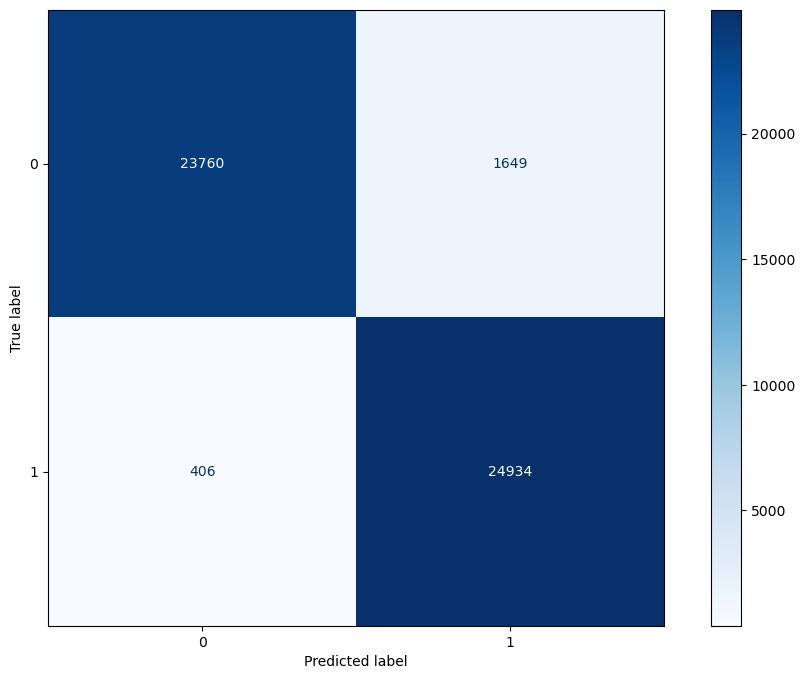

In [152]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


### Curva ROC

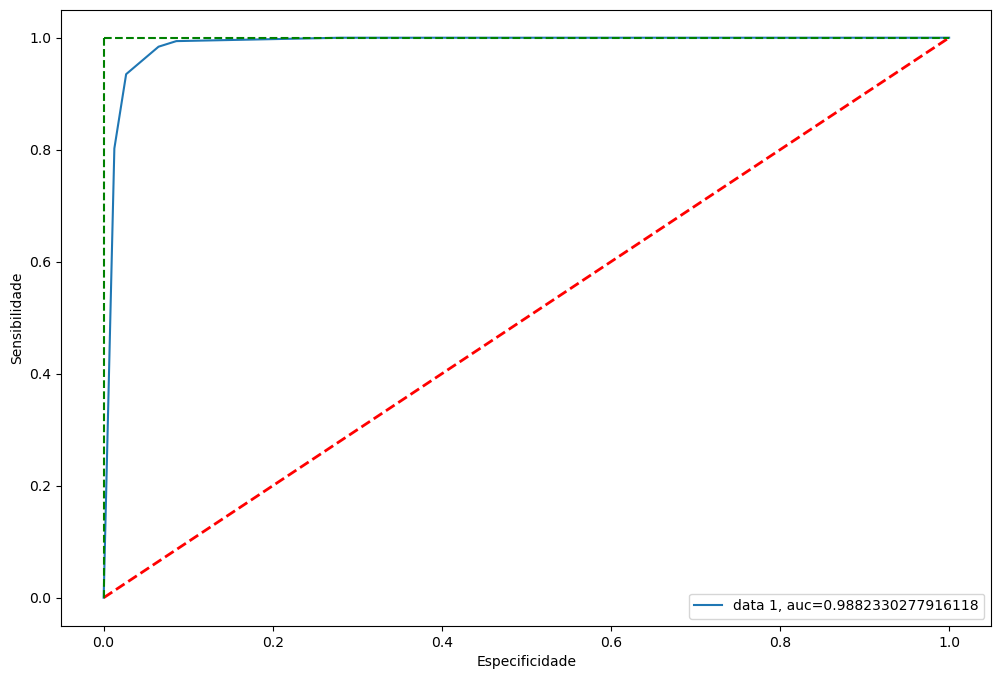

In [153]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.legend(loc=4)

## Random Forest

Random Forest é um algoritmo de aprendizado de máquina baseado em um conjunto de várias árvores de decisão. Em vez de depender de uma única árvore, ele constrói múltiplas árvores e combina seus resultados para obter uma classificação mais robusta e precisa.

Como Funciona?

O algoritmo cria diversas árvores de decisão, cada uma treinada com um subconjunto aleatório dos dados (técnica conhecida como "bootstrap").

Cada árvore realiza uma previsão sobre se uma transação é fraudulenta ou não.

A previsão final é feita por meio de uma votação entre as árvores (para classificação) ou uma média dos resultados (para regressão).

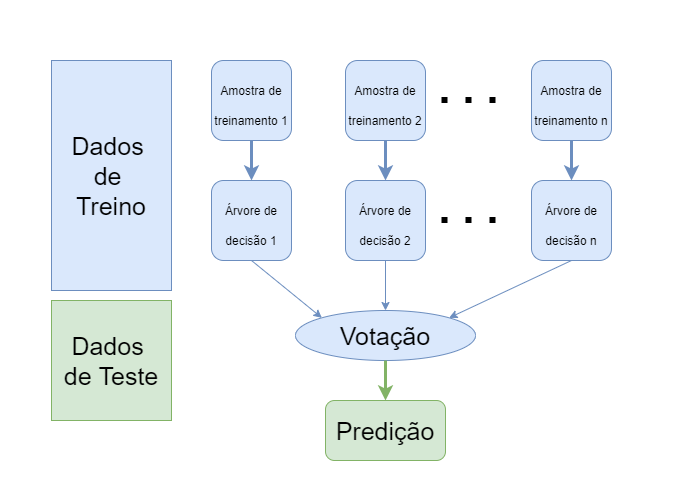

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rf = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [156]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

### Métricas de avaliação

In [157]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9722950205915387
Precisão: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


### Matriz de Confusão

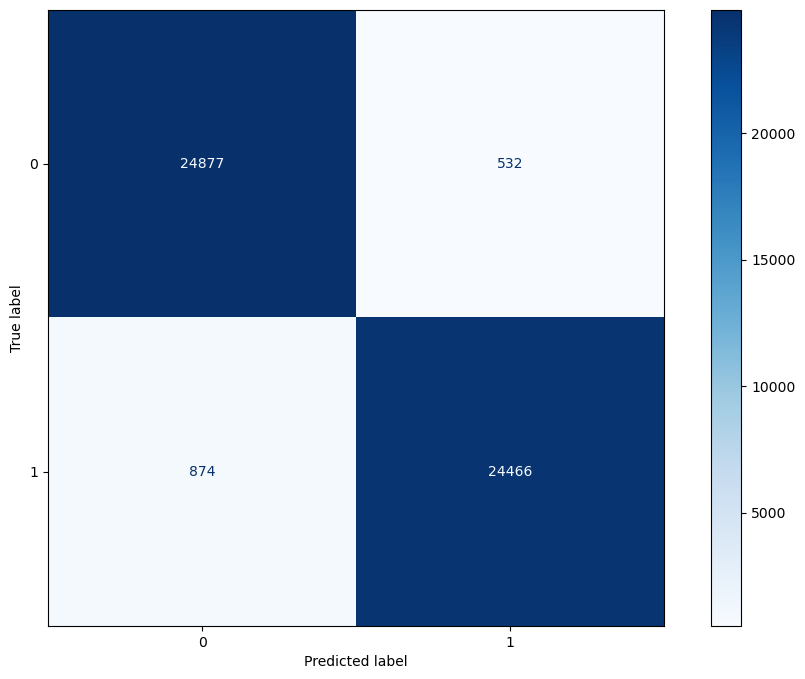

In [158]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


### Curva ROC

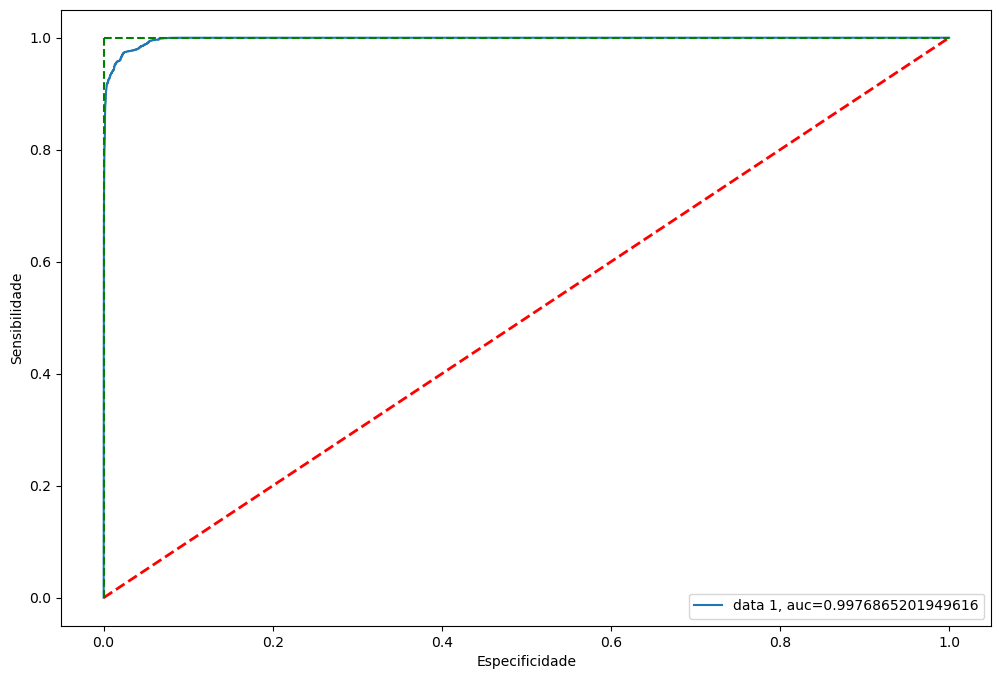

In [159]:
y_pred_proba =  rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.legend(loc=4)

## Análise de Métricas

In [160]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]
    # dicionario contendo os tres modelos usados até então

LogisticRegression
****Resultados****
Accuracy: 0.965437742615618
Precision: 0.96745679403837
Recall: 0.9631807419100237
F1: 0.9653140325897801
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9595065912628821
Precision: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883905
RandomForestClassifier
****Resultados****
Accuracy: 0.9722950205915387
Precision: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


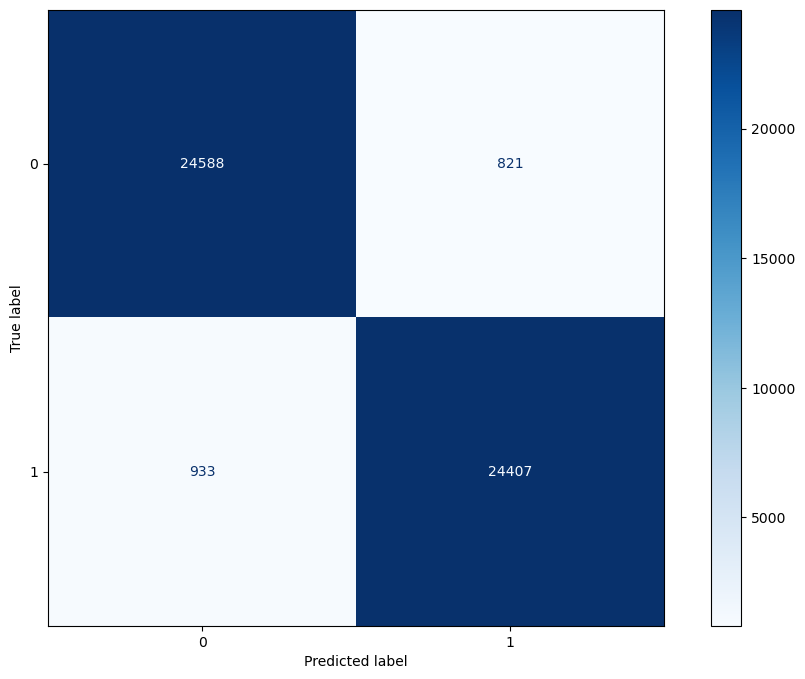

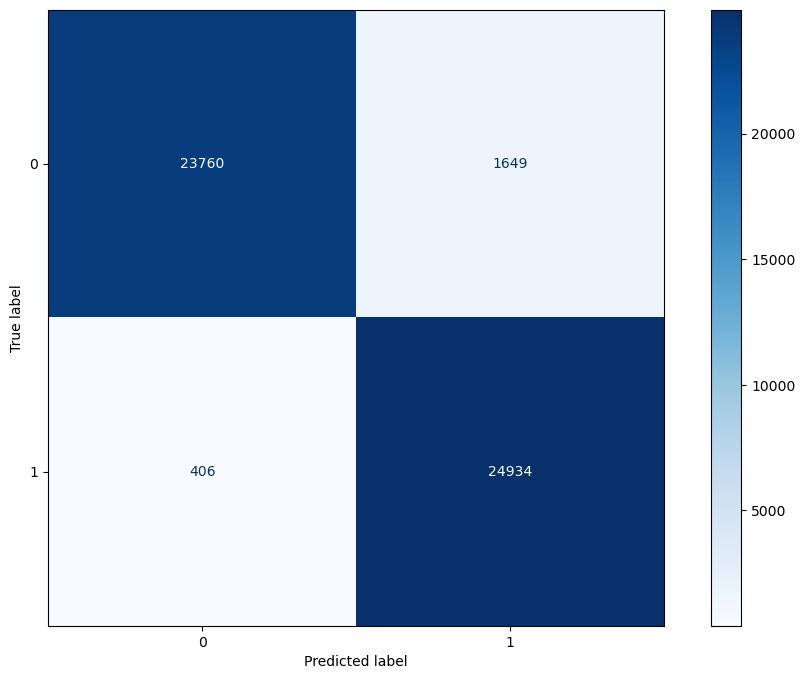

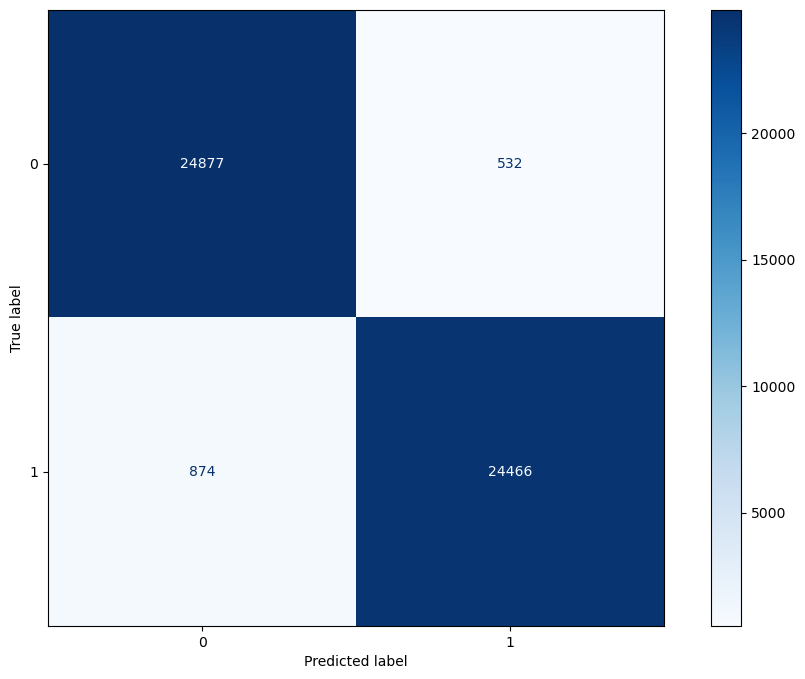

In [161]:
for clf in classifiers:
  clf.fit(x_train, y_train)                                     # Treinar os tres modelos no nosso dicionario
  name = clf.__class__.__name__
  print("="*30)                                                 # separador
  print(name)
  print('****Resultados****')                                   # Titulo resultados
  y_pred = clf.predict(x_test)                                  # fazer previsões do modelo
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1:", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap="Blues")


**Regressão Logística**

TP: 2588, FP: 821, FN: 933, TN: 24407

O modelo tem um número razoável de verdadeiros positivos, mas ainda comete muitos erros, especialmente falsos positivos e falsos negativos. Isso pode indicar que a regressão logística não está a capturar bem a complexidade dos padrões de fraude.


**Árvore de Decisão**

TP: 23760, FP: 1649, FN: 406, TN: 24934

Esse modelo está a capturar muito melhor os padrões de fraude, com um número elevado de verdadeiros positivos e um número relativamente baixo de falsos negativos. No entanto, ainda há alguns falsos positivos, o que pode indicar que o modelo está a classificar algumas transações legítimas como fraudulentas.


**Random Forest**


TP: 24877, FP: 532, FN: 874, TN: 24476
Esse modelo teve um desempenho ainda melhor que a Árvore de Decisão, reduzindo os falsos positivos e mantendo um número alto de verdadeiros positivos. Isso sugere que o Random Forest pode estar a generalizar melhor os padrões de fraude, minimizando erros e sendo mais preciso na classificação.


**Avaliação Geral**


A regressão logística tem desempenho mais fraco, pois apresenta mais erros (tanto FN quanto FP).
A árvore de decisão melhora bastante, reduzindo os falsos negativos, mas ainda tem mais falsos positivos do que o Random Forest.

O Random Forest parece ser o melhor modelo entre os três, com a melhor combinação de TP alto e FP baixo, o que indica uma boa precisão e recall, e sendo assim, será o modelo que iremos melhorar.

## Melhorando o modelo

Melhorar o modelo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) utilizando o método [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Ele define automaticamente os melhores parametros para o nosso modelo


In [162]:
n_estimators = np.arange(20, 200, step=20)      
criterion = ["gini", "entropy"]                 
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [163]:
# Dicionário de parámetros
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [164]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [165]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)

In [166]:

rcv = random_cv.fit(x, y)

c:\Users\josel\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\josel\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\josel\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\josel\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraint

In [167]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.239888      0.011424         0.000000        0.000000   
1       0.115609      0.076495         0.000000        0.000000   
2      29.282213      1.288929         0.640531        0.123542   
3      60.634031      6.469066         1.239378        0.165592   
4      36.109057      2.563972         1.039514        0.176899   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...                NaN   
1  {'n_estimators': 120, 'min_samples_split': 4, ...                NaN   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.981379   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.992374   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0                NaN                NaN              NaN             NaN   
1                NaN                NaN              NaN             NaN   
2           0.999823           0.972245         0.984482        0.011470   
3           0.999438           0.988502         0.993438        0.004528   
4           0.929182           0.928913         0.924106        0.006989   

   rank_test_score  
0                4  
1                4  
2                2  
3                1  
4                3

In [168]:
# Visualizar os melhores parámetros do modelo
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

## Resultados Finais

In [169]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED) # usar os parámetros salvos anteriormente no novo modelo (rfn - random forest novo)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

In [170]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9910540109164713
Precisão: 0.9911193558572782
Recall: 0.9909629044988161
F1: 0.991041124003473


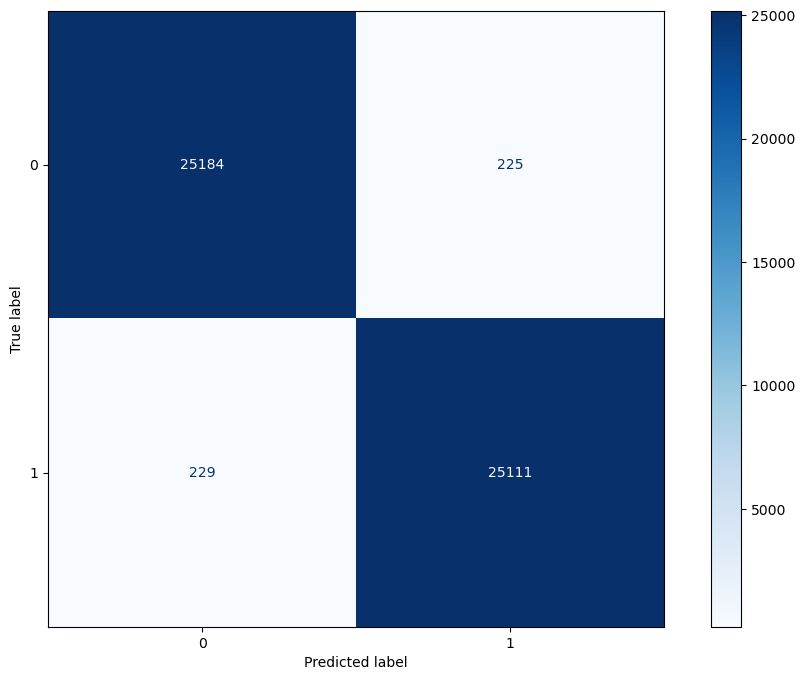

In [171]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


## Conclusão

**Voltando as hipóteses**

• O(a) cliente tem um certo padrão de movimentação do dinheiro, em horário comercial, e a fraude ocorreu fora deste horário, como por exemplo durante a madrugada.

• Ainda em relação ao tempo, o cliente pode fazer suas principais movimentações em um período inicial do mês e a fraude foi vista em um dia não habitual.

      - Fazer um CAPTCHA para aumentar a segurança em horários não convencionais.

• O(a) cliente utiliza como padrão o pagamento em dinheiro, seja por PIX ou retirada*, e a fraude pode ocorrer por um pagamento por transferência.

      - Solicitar uma verificação de informação adicional do banco, como uma pergunta de segurança, para movimentações de transferência.